In [ ]:
# Model for mito-nuclear interaction
# References:
# A Model for Mitonuclear Coevolution: Speciation and the Barcode Hypothesis; Debora Princepe and Marcus A.M. de Aguir, Syst. Biol (2020)
# Signatures of microevolutionary processes in phylogenetic patterns; Carolina L. N. Costa et al., Systematic Biology 68 (2019) 131

#
import FortranMitoNuclear

# enviroment variables - linear size of the living area ( L1 >= L2 )
L1 = 400         
L2 = 25

# population variables
n_ind = 1300                    #number of individuals
mating_radius = 5.0             #mating radius 
nuc_mutation_rate = 0.00025     #mutation probability per locus in nDNA
mito_mutation_rate = 0.00075    #mutation probability per locus in mtDNA
diffusion = 0.02                #probability that offspring will not be placed at parent position
n_jump = 20                     #number of neighboring sites where offspring can be (randomly) placed
no_mate_prob = 0.37             #probability that individual will not leave offspring
mnpm = 3                        #minimum number of compatible mates in the mating neighborhood for reproduction
rmax = 2                        #if number of compatible mates < mnpm, mating radius is increased by 1 until rmax


# genetic variables
nuc_genome = 1500           #nucler genome size (number of loci)
mito_genome = 500           #mitochondrial genome size (number of loci)
n_gen_threshold = 75        #maximum number of nuclear genetic differences for successful mating (Hamming distance)

# interaction strength (width of fitness function)
width = 0.025

# simulation parameters
time = 400                  #number of generations
n_read = 0                  # 0=start new run;  1=read previous data and continue from there
random_seed = 1234          # seed for random number generator

# wrap integer parameters into vector
vec_int=(L1,L2,n_ind,rmax,mnpm,n_jump,nuc_genome,mito_genome,n_gen_threshold,time,n_read,random_seed)

# wrap real parameters into vector
vec_real=(nuc_mutation_rate,mito_mutation_rate,diffusion,no_mate_prob,mating_radius,width)

# Call FORTRAN routine
FortranMitoNuclear.submitonuclear(vec_int,vec_real)
#



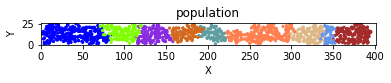

In [4]:
#  -------- plot species  -----------
#
#
import matplotlib.pyplot as plt
import numpy as np
from mycolors import cnames

plt.close('all')
plt.figure(1)

# read data 
xc, yc, cc = np.loadtxt("speciesplot.dat", unpack=True)

nc=np.size(xc)
c = np.zeros(nc, dtype=list)
for k in range(0,nc):
    c[k] = cnames[int(cc[k])]
    
cnew = c.tolist()   
plt.scatter(xc,yc,color=cnew,s=5,marker="o")
plt.xlabel("X")
plt.ylabel("Y")

plt.axis("scaled")
plt.axis([0,L1+1,0,L2+1])
plt.title("population")
plt.savefig("species.pdf")
plt.show()
#
#
#  -------- end plotting species  -----------



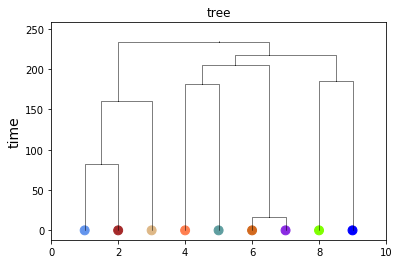

number of species = 9.0
gamma index = -2.26
alpha index = -1.189
normalized Sackin index = -0.671
Sackin index = 31


In [5]:
# -------- run tree -----------------

# Call FORTRAN routine
import FortranTree

FortranTree.subtree()

#  -------- plot tree with species  -----------
#
#
import matplotlib.pyplot as plt
import numpy as np
from mycolors import cnames

# replace -1 by NAN in tree file
import subprocess
subprocess.call(["sed -i -e 's/-1/NAN/g' tree.dat"], shell=True)
# subprocess.call(["sed -i -e 's/-1/NAN/g' tree-cluster-time-win.dat"], shell=True)
#plt.close('all')

# plot tree and save image
plt.figure(2)
tx = 0.0
ty = 0.0

# tree
tx, ty = np.loadtxt('tree.dat', unpack=True)
plt.title("tree")
plt.axis([0,max(tx)+1,-max(ty)*0.05,max(ty)*1.1])
plt.ylabel("time",fontsize=14)
plt.plot(tx,ty, linewidth=0.5, color='black')

# species colors
xsp, ccsp = np.loadtxt('order.dat', unpack=True)
nc = np.size(xsp)
csp = np.zeros(nc, dtype=list)
ysp = np.zeros(nc, dtype=list)
for k in range(0,nc):
    csp[k] = cnames[int(ccsp[k])]    
cspnew = csp.tolist()    
plt.scatter(xsp,ysp,color=cspnew,s=80,marker="o")

# save
plt.savefig("tree.pdf")
plt.show()
#
#  -------- end tree plot  -----------


# print output parameters
nt, n, gamma, alpha, sackin_norm, sackin = np.loadtxt('ntgasns-upgma.dat', unpack=True)

print('number of species =',n)
print('gamma index =',gamma)
print('alpha index =',alpha)
print('normalized Sackin index =',sackin_norm)
print('Sackin index =',int(sackin))
